# MAPPO Evaluation & Rendering

This runs the trained MAPPO policy with the patrolling zoo.

In [7]:
%reload_ext autoreload
%autoreload 2
from onpolicy.scripts.render.render_patrolling import get_config, parse_args, main

import os
os.environ["WANDB__SERVICE_WAIT"] = "300"

In [8]:
parser = get_config()
all_args = parse_args([], parser)

all_args.use_render = True
all_args.model_dir = "./onpolicy/scripts/results/Patrolling/4nodes/rmappo/terminalRewardOnly/wandb/run-20230817_125044-edv4n9sh/files"

all_args.experiment_name = "heavierGlobalWeight"
all_args.env_name = "Patrolling"
all_args.user_name = "anthony-goeckner"

all_args.num_agents = 2
all_args.graph_name = "4nodes"
all_args.graph_file = f"patrolling_zoo/env/{all_args.graph_name}.graph"

all_args.episode_length = 200
all_args.render_episodes = 1

all_args.algorithm_name = "rmappo"
all_args.use_recurrent_policy = True
all_args.use_naive_recurrent_policy = False
all_args.use_centralized_V = True

all_args.n_rollout_threads = 1

all_args.use_wandb = False

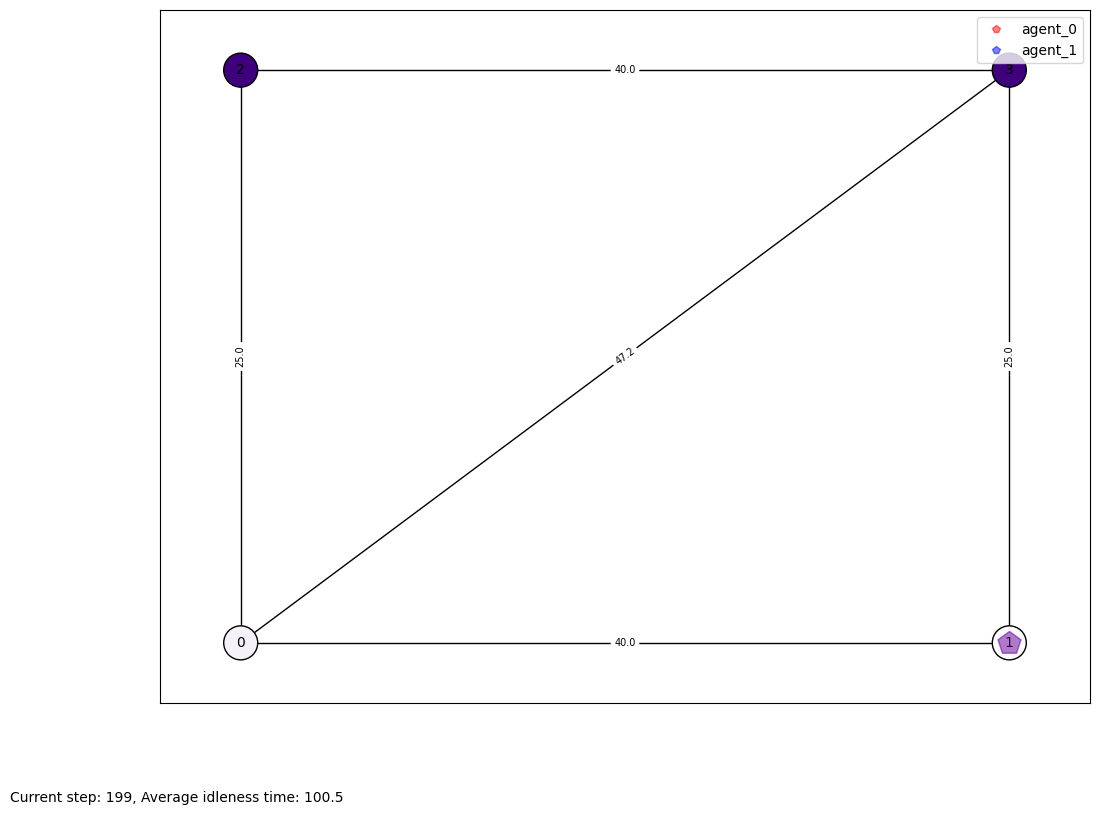

In [9]:
main([], parsed_args = all_args)